In [2]:
# reading the csv file
df=pd.read_csv("Hepatic disease dataset.csv")

In [3]:
# viewing the data frame
df.columns = df.columns.str.replace('is_patient', 'target')
df.head(2)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,target
0,65.0,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1


In [4]:
# Analysis
df.shape

(583, 11)

In [5]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,target
0,65.0,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,NaN,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df_duplicate = df[df.duplicated(keep = False)] # keep = False gives you all rows with duplicate entries
df = df[~df.duplicated(subset = None, keep = 'first')]
df.shape

(576, 11)

In [7]:
# descriptive Statistics
df.describe(include="all")

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,target
count,518.000000,518,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,572.000000,576.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,45.071429,NaN,3.303819,1.488542,291.407986,80.815972,110.072917,6.485764,3.141840,0.946101,1.288194
std,16.227014,NaN,6.239048,2.820744,244.174425,183.575998,290.569040,1.088168,0.796363,0.319239,0.453316
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.250000,87.000000,7.200000,3.800000,1.100000,2.000000


In [8]:
#checking for null values
df.isnull().sum()

age                 58
gender              58
tot_bilirubin        0
direct_bilirubin     0
tot_proteins         0
albumin              0
ag_ratio             0
sgpt                 0
sgot                 0
alkphos              4
target               0
dtype: int64

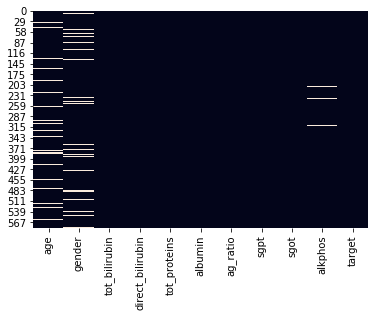

In [9]:
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [10]:
# Data types
df.dtypes

age                 float64
gender               object
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
target                int64
dtype: object

In [11]:
df.target.value_counts()

1    410
2    166
Name: target, dtype: int64

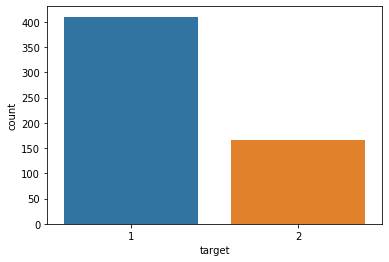

In [12]:
sns.countplot(x=df.target,data=df)
plt.show()

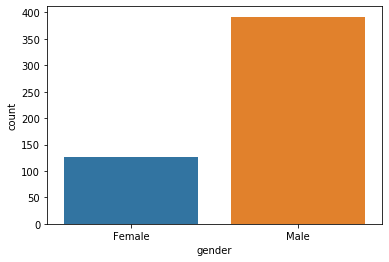

In [13]:
sns.countplot(x=df.gender,data=df)
plt.show()

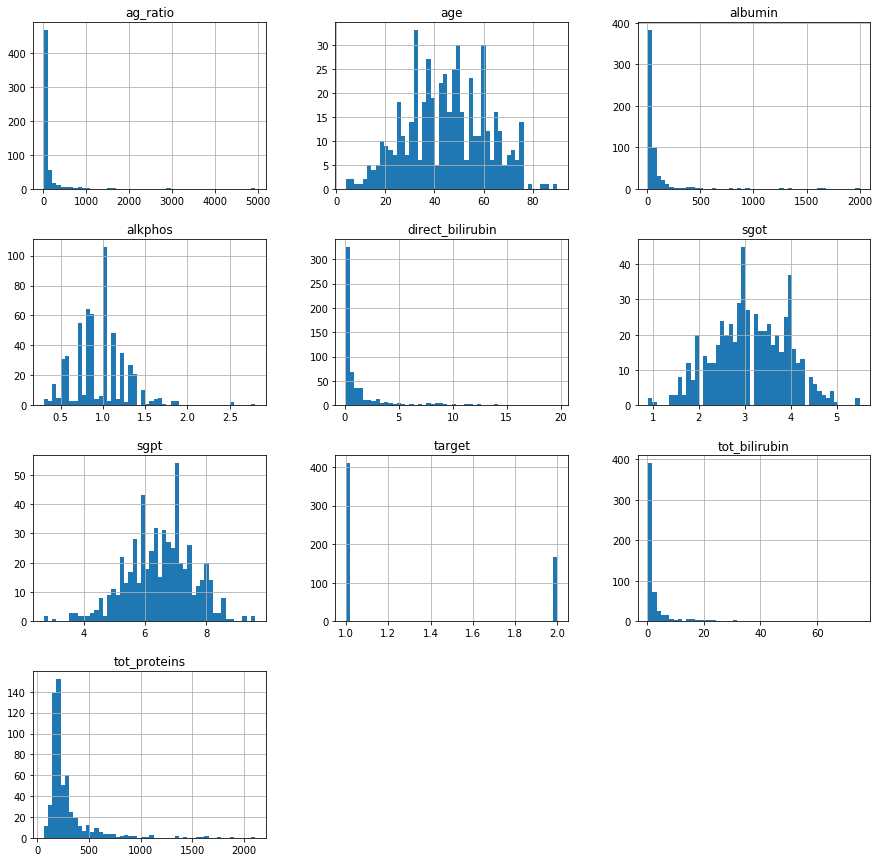

In [14]:
df.hist(bins=50,figsize=(15,15))
plt.show()

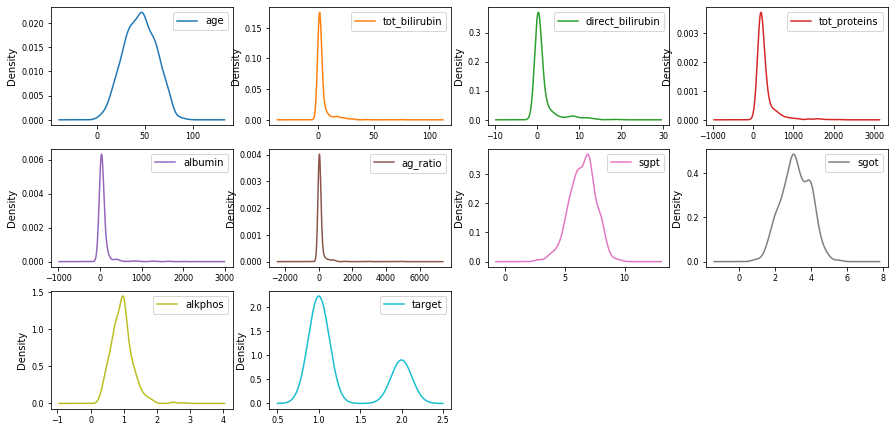

In [15]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize = (15, 10))
plt.show()

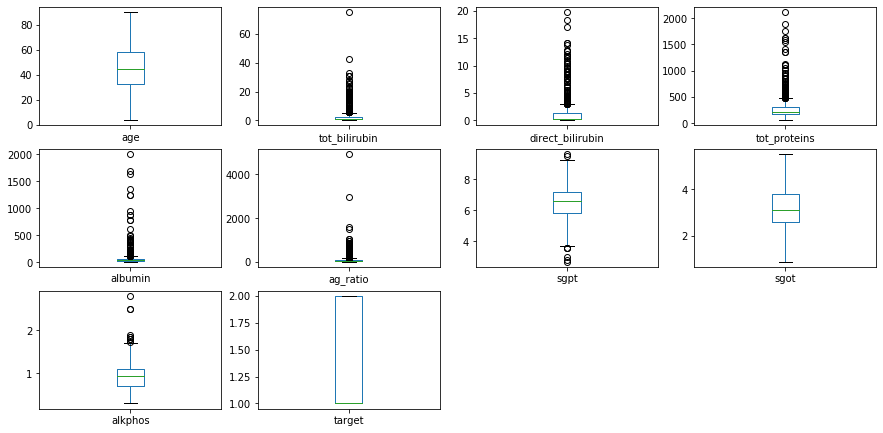

In [16]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=10, figsize = (15, 10))
plt.show()

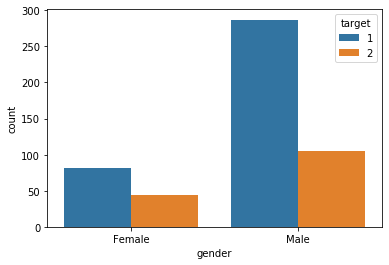

In [17]:
sns.countplot(x = 'gender', hue = 'target', data = df)
plt.show()

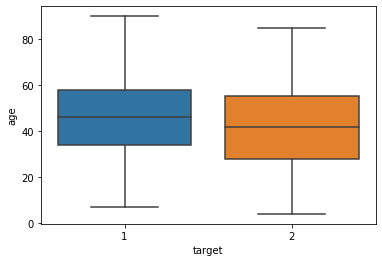

In [18]:
sns.boxplot( x = df.target, y = df.age)
plt.show()

In [19]:
df.corr()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,target
age,1.000000,-0.001767,-0.008194,0.079113,-0.093953,-0.023103,-0.194597,-0.268368,-0.210482,-0.124835
tot_bilirubin,-0.001767,1.000000,0.874282,0.206796,0.215284,0.238473,-0.006224,-0.219871,-0.204113,-0.223173
direct_bilirubin,-0.008194,0.874282,1.000000,0.235228,0.235364,0.258401,0.001658,-0.225994,-0.197462,-0.249166
tot_proteins,0.079113,0.206796,0.235228,1.000000,0.125037,0.166730,-0.028898,-0.164907,-0.233111,-0.185711
albumin,-0.093953,0.215284,0.235364,0.125037,1.000000,0.791890,-0.043536,-0.029823,-0.001099,-0.163582
ag_ratio,-0.023103,0.238473,0.258401,0.166730,0.791890,1.000000,-0.025857,-0.085135,-0.069168,-0.152750
sgpt,-0.194597,-0.006224,0.001658,-0.028898,-0.043536,-0.025857,1.000000,0.784703,0.235686,0.038652
sgot,-0.268368,-0.219871,-0.225994,-0.164907,-0.029823,-0.085135,0.784703,1.000000,0.688459,0.165502
alkphos,-0.210482,-0.204113,-0.197462,-0.233111,-0.001099,-0.069168,0.235686,0.688459,1.000000,0.166282
target,-0.124835,-0.223173,-0.249166,-0.185711,-0.163582,-0.152750,0.038652,0.165502,0.166282,1.000000


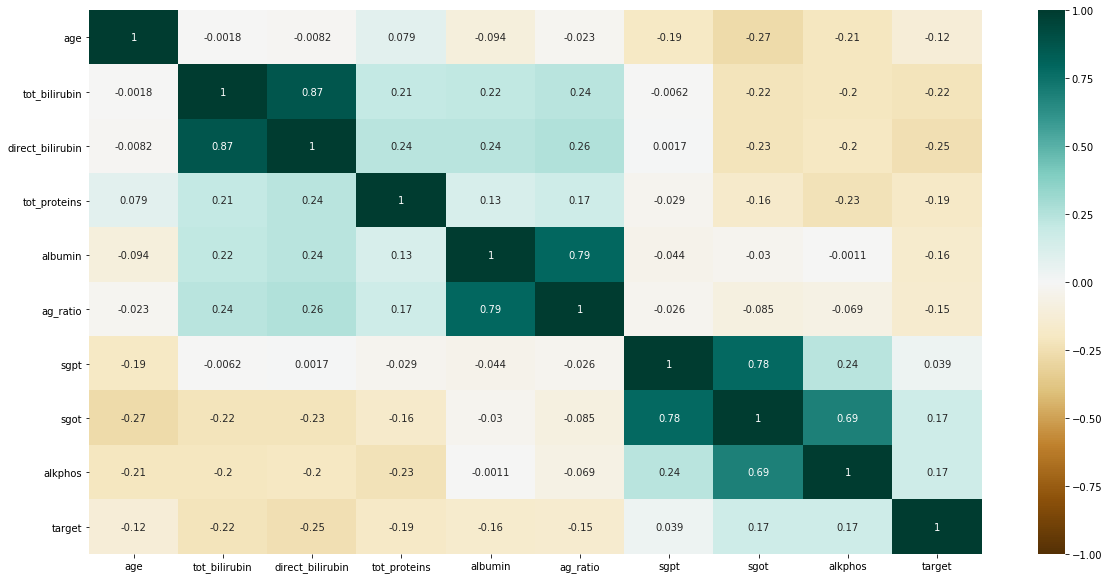

In [20]:
# heatmap
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",vmin=-1,vmax=1,annot=True)
plt.show()
# No features have high correlation with the target. 

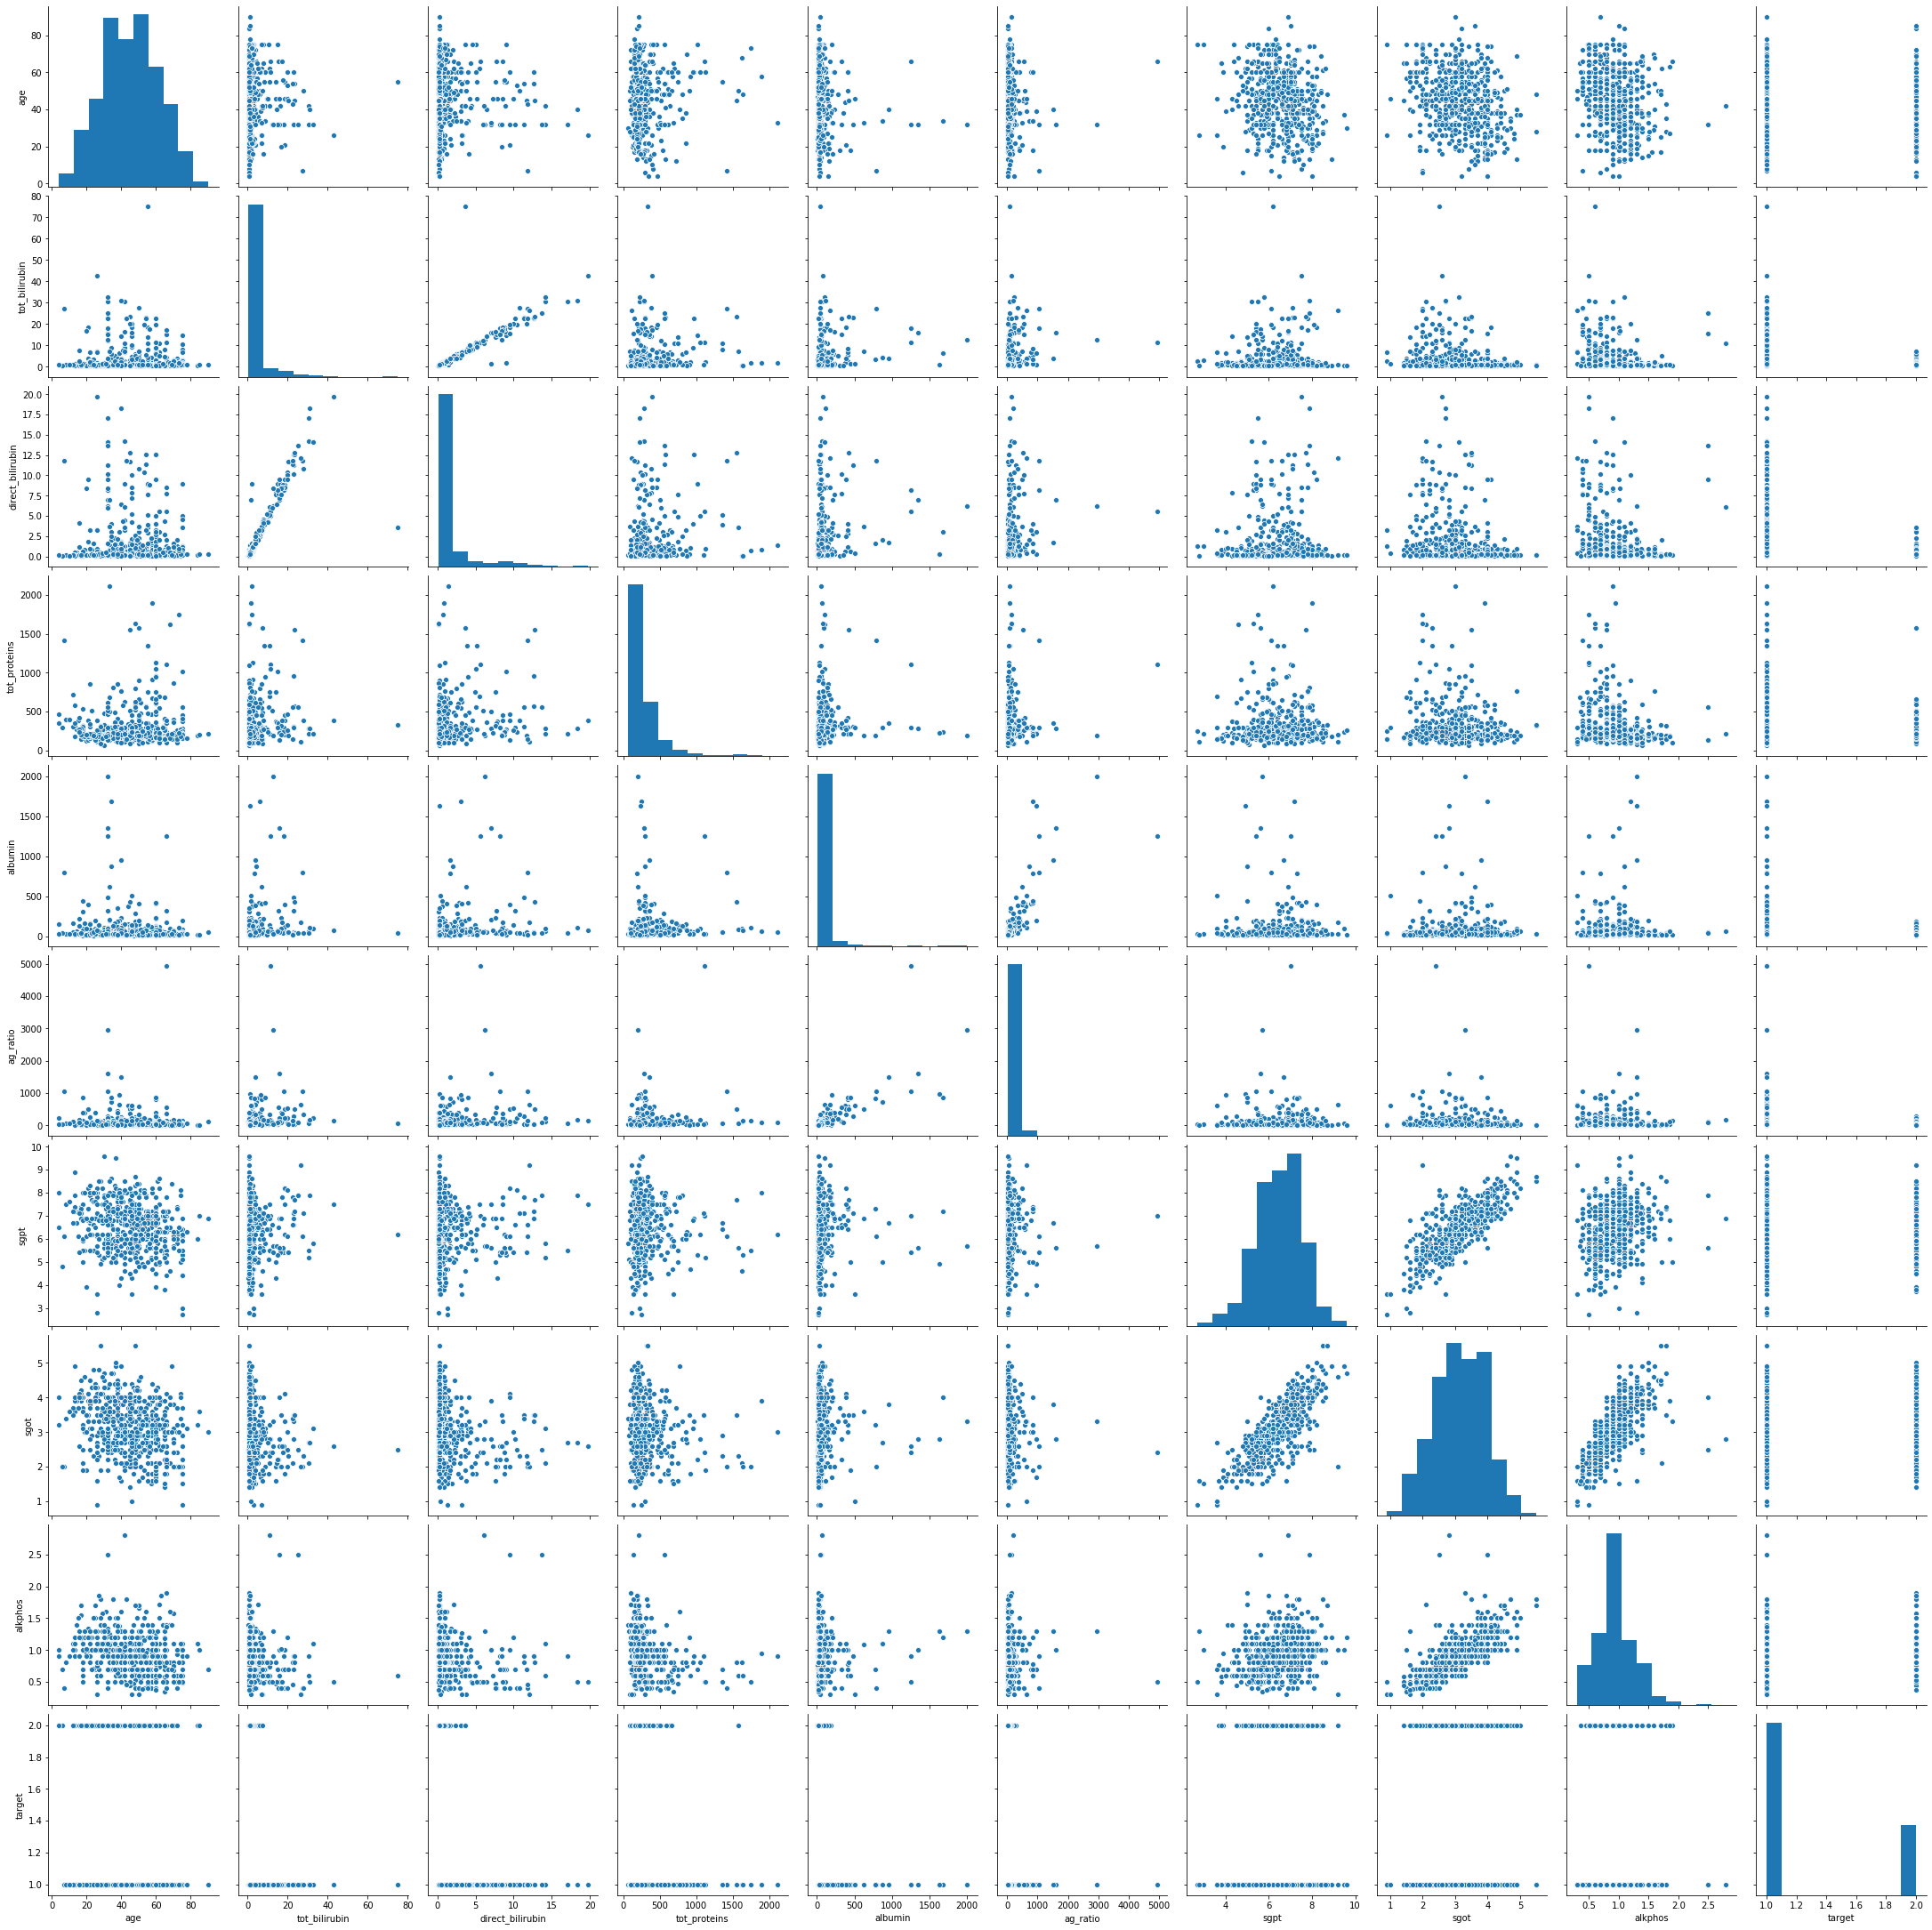

In [21]:
sns.pairplot(df,height=3) # scatter matrix
plt.show()

In [22]:
df["age"].fillna(np.nanmean(df["age"]),inplace=True)

In [23]:
df["gender"].fillna((df["gender"].mode()[0]),inplace=True)

In [24]:
df["alkphos"].fillna(np.nanmedian(df["alkphos"]),inplace=True)

In [25]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
target              0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               576 non-null    float64
 1   gender            576 non-null    object 
 2   tot_bilirubin     576 non-null    float64
 3   direct_bilirubin  576 non-null    float64
 4   tot_proteins      576 non-null    int64  
 5   albumin           576 non-null    int64  
 6   ag_ratio          576 non-null    int64  
 7   sgpt              576 non-null    float64
 8   sgot              576 non-null    float64
 9   alkphos           576 non-null    float64
 10  target            576 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 74.0+ KB


In [27]:
df.head(2)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,target
0,65.0,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1


# Making data ready for model building

In [28]:
df1 = df['target'].replace(2,0)
gen = pd.get_dummies(df.gender, drop_first = True)
df2 = pd.concat([df, gen], axis = 1)
df3 = df2.drop('target',axis=1)
df4 = df3.drop('gender',axis=1)
df5 = pd.concat([df4,df1], axis = 1)
df5.head(2)

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,Male,target
0,65.0,0.7,0.1,187,16,18,6.8,3.3,0.90,0,1
1,62.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1


## Handling class imbalance using SMOTE

In [29]:
# !pip install imblearn

In [30]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE
input1 = df5.drop('target',axis=1)
output1 = df5['target']
seed=10
oversample = SMOTE(random_state=seed)
input1,output1 = oversample.fit_resample(input1,output1)
input1.shape

(820, 10)

In [31]:
# SMOTE applied Dataframe ready to use for modelling
df_smote=pd.concat([input1,output1],axis=1)
# Final dataframe before scaling
df_smote.head(2)

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,Male,target
0,65.0,0.7,0.1,187,16,18,6.8,3.3,0.90,0,1
1,62.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1


In [32]:
df_smote.target.value_counts()

1    410
0    410
Name: target, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

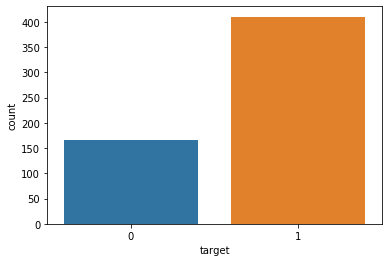

In [33]:
sns.countplot(x=df5.target)
plt.show

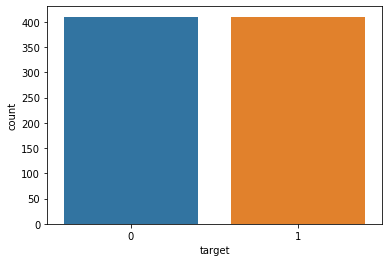

In [34]:
sns.countplot(x=output1)
plt.show()

In [35]:
## Scaling data

# Checking for multicolinearity and VIF

In [36]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### VIF before performing SMOTE

In [37]:
# For each X, calculate VIF and save in dataframe
df_vif_check = df5.drop(['Male','target'],axis=1)
vif = pd.DataFrame()
vif["Features"] = df_vif_check.columns
vif["VIF Factor"] = [variance_inflation_factor(df_vif_check.values, i) for i in range(df_vif_check.shape[1])]
vif.round(2).sort_values('VIF Factor', ascending = False)

,Features,VIF Factor
7,sgot,129.26
6,sgpt,98.51
8,alkphos,24.62
0,age,8.37
2,direct_bilirubin,5.72
1,tot_bilirubin,5.46
4,albumin,3.29
5,ag_ratio,3.19
3,tot_proteins,2.64


In [38]:
# removing sgot
df_vif_check = df5.drop(['sgot','Male','target'],axis=1)
vif = pd.DataFrame()
vif["Features"] = df_vif_check.columns
vif["VIF Factor"] = [variance_inflation_factor(df_vif_check.values, i) for i in range(df_vif_check.shape[1])]
vif.round(2).sort_values('VIF Factor', ascending = False)

,Features,VIF Factor
6,sgpt,17.46
7,alkphos,10.42
0,age,7.11
2,direct_bilirubin,5.56
1,tot_bilirubin,5.45
4,albumin,3.27
5,ag_ratio,3.17
3,tot_proteins,2.63


In [39]:
# removing sgpt
df_vif_check = df5.drop(['sgpt','sgot','Male','target'],axis=1)
vif = pd.DataFrame()
vif["Features"] = df_vif_check.columns
vif["VIF Factor"] = [variance_inflation_factor(df_vif_check.values, i) for i in range(df_vif_check.shape[1])]
vif.round(2).sort_values('VIF Factor', ascending = False)

,Features,VIF Factor
2,direct_bilirubin,5.55
1,tot_bilirubin,5.44
0,age,5.31
6,alkphos,4.50
4,albumin,3.26
5,ag_ratio,3.16
3,tot_proteins,2.47


### VIF after performing oversampling by SMOTE

In [40]:
# For each X, calculate VIF and save in dataframe
df_vif_check = df_smote.drop(['Male','target'],axis=1)
vif = pd.DataFrame()
vif["Features"] = df_vif_check.columns
vif["VIF Factor"] = [variance_inflation_factor(df_vif_check.values, i) for i in range(df_vif_check.shape[1])]
vif.round(1).sort_values('VIF Factor', ascending = False)

,Features,VIF Factor
7,sgot,160.0
6,sgpt,115.1
8,alkphos,30.9
0,age,8.2
2,direct_bilirubin,5.7
1,tot_bilirubin,5.5
4,albumin,3.3
5,ag_ratio,3.2
3,tot_proteins,2.9


In [41]:
# removing sgot
df_vif_check = df_smote.drop(['sgot','Male','target'],axis=1)
vif = pd.DataFrame()
vif["Features"] = df_vif_check.columns
vif["VIF Factor"] = [variance_inflation_factor(df_vif_check.values, i) for i in range(df_vif_check.shape[1])]
vif.round(2).sort_values('VIF Factor', ascending = False)

,Features,VIF Factor
6,sgpt,19.35
7,alkphos,12.60
0,age,6.94
2,direct_bilirubin,5.56
1,tot_bilirubin,5.51
4,albumin,3.27
5,ag_ratio,3.17
3,tot_proteins,2.83


In [42]:
# removing sgpt
df_vif_check = df_smote.drop(['sgpt','sgot','Male','target'],axis=1)
vif = pd.DataFrame()
vif["Features"] = df_vif_check.columns
vif["VIF Factor"] = [variance_inflation_factor(df_vif_check.values, i) for i in range(df_vif_check.shape[1])]
vif.round(2).sort_values('VIF Factor', ascending = False)

,Features,VIF Factor
0,age,5.58
2,direct_bilirubin,5.56
1,tot_bilirubin,5.49
6,alkphos,4.81
4,albumin,3.27
5,ag_ratio,3.17
3,tot_proteins,2.61


In [43]:
# splitting and scaling the data into training and testing data sets

In [44]:
X = input1
y = output1

In [45]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = test_size, random_state = seed)

# Model 1 Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
seed=10
model_lr = LogisticRegression(random_state = seed, max_iter = 1000)
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
pred = model_lr.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [49]:
print('classes: ',model_lr.classes_)
print('coefficients: ',model_lr.coef_)
print('intercept :',model_lr.intercept_)

classes:  [0 1]
coefficients:  [[ 0.50819871  0.28770893  1.01871834  0.15737995  1.52521403  1.01197479
   0.79557319 -0.93870295  0.24395795  0.20472492]]
intercept : [0.58753583]


In [50]:
model_lr.coef_

array([[ 0.50819871,  0.28770893,  1.01871834,  0.15737995,  1.52521403,
         1.01197479,  0.79557319, -0.93870295,  0.24395795,  0.20472492]])

In [51]:
model_lr.intercept_

array([0.58753583])

In [52]:
model_lr.predict_proba(X_test)

array([[8.18360686e-01, 1.81639314e-01],
       [6.01000720e-01, 3.98999280e-01],
       [5.33423543e-01, 4.66576457e-01],
       [2.03618470e-02, 9.79638153e-01],
       [4.11913313e-01, 5.88086687e-01],
       [8.38570476e-01, 1.61429524e-01],
       [4.07291381e-01, 5.92708619e-01],
       [4.28914602e-01, 5.71085398e-01],
       [5.36843150e-01, 4.63156850e-01],
       [7.33061426e-01, 2.66938574e-01],
       [4.53711765e-01, 5.46288235e-01],
       [6.37987192e-01, 3.62012808e-01],
       [8.38971702e-01, 1.61028298e-01],
       [8.16885772e-01, 1.83114228e-01],
       [5.46128127e-01, 4.53871873e-01],
       [7.24455884e-01, 2.75544116e-01],
       [6.34596148e-01, 3.65403852e-01],
       [4.65248188e-01, 5.34751812e-01],
       [1.25874394e-01, 8.74125606e-01],
       [5.24566907e-01, 4.75433093e-01],
       [7.31683476e-01, 2.68316524e-01],
       [5.64007407e-01, 4.35992593e-01],
       [2.56792628e-02, 9.74320737e-01],
       [6.24834448e-01, 3.75165552e-01],
       [4.269523

In [53]:
from sklearn.metrics import confusion_matrix
labels = [1, 0]
con_mat = confusion_matrix(y_test, pred, labels = labels)
print(con_mat)

[[ 69  55]
 [ 22 100]]


In [54]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print('Accuracy : ',accuracy)    # Mean Accuracy on testing data
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print('Precision : ',precision)
recall = (con_mat[0,0]/(con_mat[0,0] + con_mat[0,1]))
print('Recall : ',recall)

print('Training Accuracy : ',model_lr.score(X_train, y_train)) # training accuracy
print('Testing Accuracy : ',model_lr.score(X_test, y_test)) # testing Accuracy

Accuracy :  0.6869918699186992
Precision :  0.7582417582417582
Recall :  0.5564516129032258
Training Accuracy :  0.7508710801393729
Testing Accuracy :  0.6869918699186992


In [55]:
# report for traning data set
from sklearn.metrics import accuracy_score, classification_report
threshold = 0.5
pred_train1 = np.where(model_lr.predict_proba(X_train)[:,1] >= threshold, 1, 0)
train_actual = y_train
pred_train = pred_train1
print ('Report : ')
print (classification_report(train_actual, pred_train))

Report : 
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       288
           1       0.81      0.65      0.72       286

    accuracy                           0.75       574
   macro avg       0.76      0.75      0.75       574
weighted avg       0.76      0.75      0.75       574



In [56]:
# report for testing set
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = pred
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.65      0.82      0.72       122
           1       0.76      0.56      0.64       124

    accuracy                           0.69       246
   macro avg       0.70      0.69      0.68       246
weighted avg       0.70      0.69      0.68       246



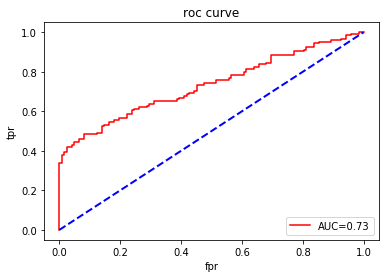

In [57]:
from sklearn.metrics import roc_curve,auc
probs=model_lr.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

(0, 1)

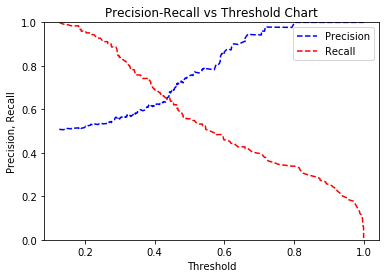

In [58]:
from sklearn.metrics import precision_recall_curve
probs = model_lr.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

# Optimizing the model

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = { 'penalty':['l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'class_weight':['none','balanced'],
              'max_iter':[500,1000,1500,2000],
             'warm_start':[True,False]}
model_lr1 = GridSearchCV(LogisticRegression(),  param_grid)

In [61]:
model_lr1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['none', 'balanced'],
                         'max_iter': [500, 1000, 1500, 2000], 'penalty': ['l2'],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
      

In [62]:
model_lr1.best_score_

0.7491380625476736

In [63]:
model_lr1.best_estimator_

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [64]:
model_lr_opt = model_lr1.best_estimator_.fit(X_train,y_train)

In [65]:
print('Training Accuracy : ',model_lr_opt.score(X_train, y_train)) # training accuracy
print('Testing Accuracy : ',model_lr_opt.score(X_test, y_test)) # testing Accuracy

Training Accuracy :  0.7508710801393729
Testing Accuracy :  0.6869918699186992


In [66]:
pred2 = model_lr_opt.predict(X_test)
labels = [1,0]
con_mat_2 = confusion_matrix(y_test, pred2, labels=labels)
print(con_mat_2)

[[ 69  55]
 [ 22 100]]


In [67]:
accuracy = (con_mat_2[0,0]+con_mat_2[1,1])/y_test.size
print('Accuracy : ',accuracy)  
precision = con_mat_2[0][0]/(con_mat_2[0][0] + con_mat_2[1][0])
print('Precision : ',precision)
recall = (con_mat_2[0,0]/(con_mat_2[0,0] + con_mat_2[0,1]))
print('Recall : ',recall)

Accuracy :  0.6869918699186992
Precision :  0.7582417582417582
Recall :  0.5564516129032258


In [68]:
# for traning data
threshold = 0.6
pred_train2 = np.where(model_lr_opt.predict_proba(X_train)[:,1] >= threshold, 1, 0)
#pred_train2 = model_lr_opt.predict(X_train)
train_actual = y_train
pred_train = pred_train2
print ('Report : ')
print (classification_report(train_actual, pred_train))

Report : 
              precision    recall  f1-score   support

           0       0.68      0.95      0.79       288
           1       0.92      0.54      0.68       286

    accuracy                           0.75       574
   macro avg       0.80      0.75      0.74       574
weighted avg       0.80      0.75      0.74       574



In [69]:
# for testing data
#threshold = 0.01
#pred1 = np.where(model_lr_opt.predict_proba(X_test)[:,1] >= threshold, 1, 0)
pred1 = model_lr_opt.predict(X_test)
actual = y_test
predicted = pred1
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.65      0.82      0.72       122
           1       0.76      0.56      0.64       124

    accuracy                           0.69       246
   macro avg       0.70      0.69      0.68       246
weighted avg       0.70      0.69      0.68       246



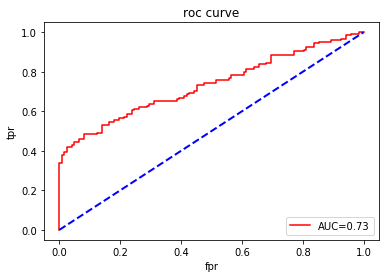

In [70]:
from sklearn.metrics import roc_curve,auc
probs2 = model_lr_opt.predict_proba(X_test)
preds2 = probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

(0, 1)

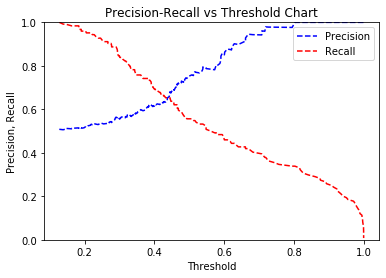

In [71]:
probs2 = model_lr_opt.predict_proba(X_test)
preds2 = probs2[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds2)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

# Support Vector Classifier

In [72]:
from sklearn.model_selection import train_test_split
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed,stratify=y)

In [73]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear',probability=True)

In [74]:
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [75]:
y_pred = svm_model.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7601626016260162

In [77]:
svm_model.coef_

array([[ 0.34686114, -0.09679632,  1.0314656 ,  0.34918104,  0.89857754,
         0.74448198,  0.43782384, -0.58974508,  0.08908613,  0.26686071]])

In [78]:
# confusion matrix
pred2 = svm_model.predict(X_test)
labels = [1,0]
con_mat_2 = confusion_matrix(y_test, pred2,labels=labels)
print(con_mat_2)

[[ 74  49]
 [ 10 113]]


In [79]:
accuracy = (con_mat_2[0,0]+con_mat_2[1,1])/y_test.size
print('Accuracy : ',accuracy)  
precision = con_mat_2[0][0]/(con_mat_2[0][0] + con_mat_2[1][0])
print('Precision : ',precision)
recall = (con_mat_2[0,0]/(con_mat_2[0,0] + con_mat_2[0,1]))
print('Recall : ',recall)

Accuracy :  0.7601626016260162
Precision :  0.8809523809523809
Recall :  0.6016260162601627


In [172]:
# report for treaining set
pred_t = svm_model.predict(X_train)
actual_t = y_train
predicted = pred_t
print ('Report : ')
print (classification_report(actual_t, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       287
           1       0.84      0.56      0.67       287

    accuracy                           0.73       574
   macro avg       0.76      0.73      0.72       574
weighted avg       0.76      0.73      0.72       574



In [173]:
# report for testing set
pred2 = svm_model.predict(X_test)
actual = y_test
predicted = pred2
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       123
           1       0.88      0.60      0.71       123

    accuracy                           0.76       246
   macro avg       0.79      0.76      0.75       246
weighted avg       0.79      0.76      0.75       246



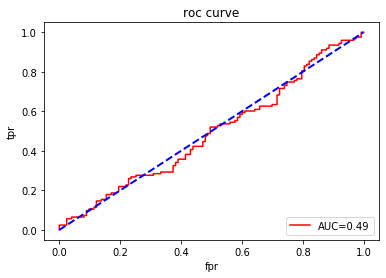

In [81]:
from sklearn.metrics import roc_curve,auc
probs2=svm_model.predict_proba(X_test)
preds2=probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

(0, 1)

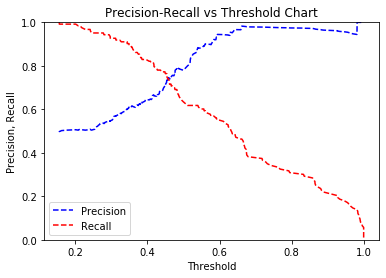

In [82]:
probs2 = svm_model.predict_proba(X_test)
preds2 = probs2[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds2)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

# Support vector Machine (radial basis function)

In [83]:
# optimization using pipline

In [84]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [85]:
svm_est = Pipeline([('scaler',StandardScaler()),('svc',SVC(probability=True, class_weight='balanced'))])

In [86]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = dict(svc__gamma=gammas, svc__C=Cs)

In [87]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

In [88]:
from sklearn.model_selection import GridSearchCV
svm_grid_cv = GridSearchCV(svm_est, param_grid=param_grid, cv=cv)
svm_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=10, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=True, random_state=None,
 

In [89]:
svm_grid_cv.best_params_

{'svc__C': 10, 'svc__gamma': 1}

In [90]:
svm_grid_cv.best_score_

0.7217391304347827

In [91]:
svm_grid_cv.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=10, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=1,
                     kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [92]:
model_svm_opt = svm_grid_cv.best_estimator_.fit(X_train,y_train)

In [93]:
# report
pred2 = model_svm_opt.predict(X_test)
labels = [1,0]
con_mat_2 = confusion_matrix(y_test, pred2,labels=labels)
print(con_mat_2)

[[81 42]
 [34 89]]


In [94]:
accuracy = (con_mat_2[0,0]+con_mat_2[1,1])/y_test.size
print('Accuracy : ',accuracy)  
precision = con_mat_2[0][0]/(con_mat_2[0][0] + con_mat_2[1][0])
print('Precision : ',precision)
recall = (con_mat_2[0,0]/(con_mat_2[0,0] + con_mat_2[0,1]))
print('Recall : ',recall)

Accuracy :  0.6910569105691057
Precision :  0.7043478260869566
Recall :  0.6585365853658537


In [95]:
# report for training data
pred_t = model_svm_opt.predict(X_train)
actual_t = y_train
predicted = pred_t
print ('Report : ')
print (classification_report(actual_t, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       287
           1       0.97      0.93      0.95       287

    accuracy                           0.95       574
   macro avg       0.95      0.95      0.95       574
weighted avg       0.95      0.95      0.95       574



In [96]:
# report for testing data
pred2 = model_svm_opt.predict(X_test)
actual = y_test
predicted = pred2
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       123
           1       0.70      0.66      0.68       123

    accuracy                           0.69       246
   macro avg       0.69      0.69      0.69       246
weighted avg       0.69      0.69      0.69       246



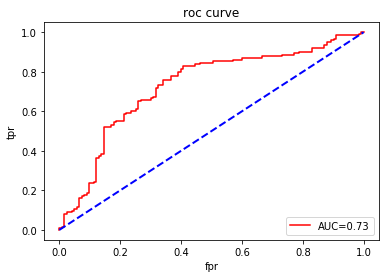

In [97]:
from sklearn.metrics import roc_curve,auc
probs2 = model_svm_opt.predict_proba(X_test)
preds2 = probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

(0, 1)

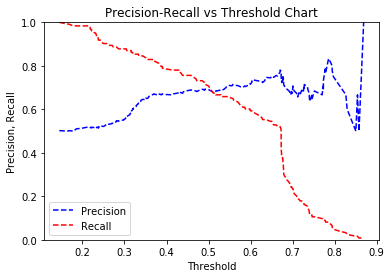

In [98]:
probs2 = model_svm_opt.predict_proba(X_test)
preds2 = probs2[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds2)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

# Decision Tree Classification

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [174]:
seed=10
DTclassifier1 = DecisionTreeClassifier(random_state=seed)
DTclassifier1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [175]:
DTpred1=DTclassifier1.predict(X_test)
DTpred1

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [176]:
from sklearn.metrics import confusion_matrix
labels = [1, 0]
DT_con_mat = confusion_matrix(y_test, DTpred1, labels = labels)
print(DT_con_mat)

[[90 33]
 [36 87]]


In [177]:
DTaccuracy = (DT_con_mat[0,0]+DT_con_mat[1,1])/y_test.size
print('DT_Accuracy : ',DTaccuracy)    # Mean Accuracy on testing data
DTprecision = DT_con_mat[0][0]/(DT_con_mat[0][0] + DT_con_mat[1][0])
print('DT_Precision : ',DTprecision)
print('DT_Training Accuracy : ',DTclassifier1.score(X_train, y_train)) # training accuracy
print('DT_Testing Accuracy : ',DTclassifier1.score(X_test, y_test)) # testing Accuracy

DT_Accuracy :  0.7195121951219512
DT_Precision :  0.7142857142857143
DT_Training Accuracy :  1.0
DT_Testing Accuracy :  0.7195121951219512


In [178]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = DTclassifier1.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       287

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



In [179]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = DTpred1
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       123
           1       0.71      0.73      0.72       123

    accuracy                           0.72       246
   macro avg       0.72      0.72      0.72       246
weighted avg       0.72      0.72      0.72       246



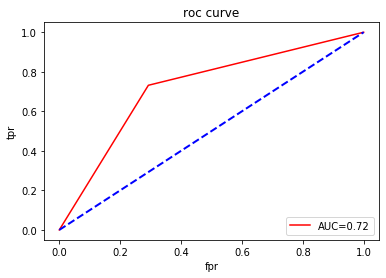

In [180]:
from sklearn.metrics import roc_curve,auc
probs2=DTclassifier1.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

### Optimization

In [181]:
DTparam_grid = { 'criterion' : ["gini", "entropy"],
                 'class_weight':['none','balanced'],
                 'max_depth' : [None,2,4,6,8,10,15],
                'max_features' : [None,"auto", "sqrt", "log2",1],
                'splitter' : ["best", "random"],
                'min_samples_leaf':[1,2,4,8],
                'min_samples_split':[4,6,10]
               }

In [182]:
seed=10
DTclf = GridSearchCV(DecisionTreeClassifier(random_state=seed),param_grid=DTparam_grid,cv=3,n_jobs=-1)

In [183]:
DTclf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': ['none', 'balanced'],
                   

In [184]:
DTclf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='random')

In [185]:
DTclf.best_score_

0.7282213496218732

In [186]:
DTbest_classifier = DTclf.best_estimator_.fit(X_train,y_train)

In [187]:
DTpred2 = DTbest_classifier.predict(X_test)
DTpred2

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0], dtype=int64)

In [188]:
labels = [1, 0]
DT_con_mat2 = confusion_matrix(y_test, DTpred2, labels = labels)
print(DT_con_mat2)

[[74 49]
 [29 94]]


In [189]:
DT2accuracy = (DT_con_mat2[0,0]+DT_con_mat2[1,1])/y_test.size
print('DT_Accuracy : ',DT2accuracy)    # Mean Accuracy on testing data
DT2precision = DT_con_mat2[0][0]/(DT_con_mat2[0][0] + DT_con_mat2[1][0])
print('DT_Precision : ',DT2precision)
print('DT_Training Accuracy : ',DTbest_classifier.score(X_train, y_train)) # training accuracy
print('DT_Testing Accuracy : ',DTbest_classifier.score(X_test, y_test)) # testing Accuracy

DT_Accuracy :  0.6829268292682927
DT_Precision :  0.7184466019417476
DT_Training Accuracy :  0.9494773519163763
DT_Testing Accuracy :  0.6829268292682927


In [190]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = DTbest_classifier.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       287
           1       0.97      0.93      0.95       287

    accuracy                           0.95       574
   macro avg       0.95      0.95      0.95       574
weighted avg       0.95      0.95      0.95       574



In [191]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = DTpred2
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       123
           1       0.72      0.60      0.65       123

    accuracy                           0.68       246
   macro avg       0.69      0.68      0.68       246
weighted avg       0.69      0.68      0.68       246



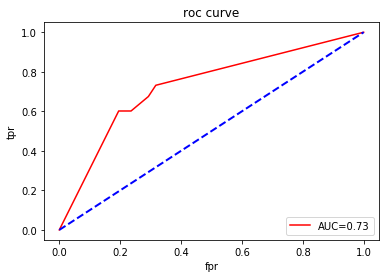

In [192]:
from sklearn.metrics import roc_curve,auc
probs2=DTbest_classifier.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

(0, 1)

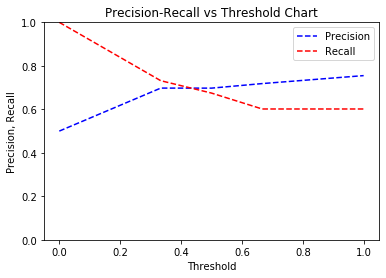

In [193]:
from sklearn.metrics import precision_recall_curve
probs = DTbest_classifier.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

## Random Forest Classification

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
random_forest = RandomForestClassifier()
rfc= random_forest.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [122]:
np.mean(y_test == rfc_pred)

0.7723577235772358

In [123]:
labels = [1, 0]
rfc_con_mat = confusion_matrix(y_test,rfc_pred, labels = labels)
print(rfc_con_mat)

[[93 30]
 [26 97]]


In [124]:
rfc_accuracy = (rfc_con_mat[0,0]+rfc_con_mat[1,1])/y_test.size
print('rfc_Accuracy : ',rfc_accuracy)    # Mean Accuracy on testing data
rfc_precision = rfc_con_mat[0][0]/(rfc_con_mat[0][0] + rfc_con_mat[1][0])
print('rfc_Prerfc_cision : ',rfc_precision)
print('rfc_Training Accuracy : ',random_forest.score(X_train, y_train)) # training accuracy
print('rfc_Testing Accuracy : ',random_forest.score(X_test, y_test)) # testing Accuracy

rfc_Accuracy :  0.7723577235772358
rfc_Prerfc_cision :  0.7815126050420168
rfc_Training Accuracy :  1.0
rfc_Testing Accuracy :  0.7723577235772358


In [125]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = random_forest.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       287

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



In [126]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = random_forest.predict(X_test)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       123
           1       0.78      0.76      0.77       123

    accuracy                           0.77       246
   macro avg       0.77      0.77      0.77       246
weighted avg       0.77      0.77      0.77       246



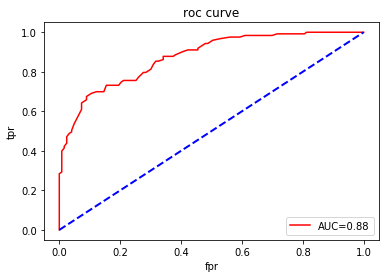

In [127]:
from sklearn.metrics import roc_curve,auc
probs2=random_forest.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

In [128]:
# Handling imbalance class

In [129]:
random_forest2 = RandomForestClassifier(random_state=0, n_estimators= 1000, oob_score=True, class_weight='balanced', n_jobs=-1)

rfc2= random_forest2.fit(X_train, y_train)
print(random_forest2.oob_score_)

0.7682926829268293


In [130]:
rfcpred2=rfc2.predict(X_test)
# rfcpred2 # accuracy

In [131]:
np.mean(y_test == rfcpred2) # accuracy

0.7764227642276422

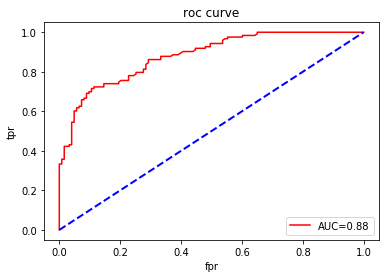

In [132]:
from sklearn.metrics import roc_curve,auc
probs2=rfc2.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

In [133]:
# Important Features in Ramdom forest

In [134]:
importances =rfc2.feature_importances_
print(importances)

[0.11208349 0.1227961  0.13547126 0.1272541  0.09914049 0.11753457
 0.08426974 0.07965773 0.1003448  0.02144771]


## Optimization

In [198]:
rfc_param_dist = {'bootstrap': [True, False],
               'oob_score':[True, False],
              'max_depth' : [None,3,5,10],
              'min_samples_leaf':[2,5,8],
              'min_samples_split':[2,4,6],
              'n_estimators': [10,100],
              'criterion' : ["gini", "entropy"],
              'class_weight':['balanced'],
               'max_features' : [None,"auto", "sqrt", "log2"], 
              }

In [199]:
RFC_clf = GridSearchCV(RandomForestClassifier(),param_grid=rfc_param_dist,cv=3,n_jobs=-1)
RFC_clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced'],
   

In [200]:
RFC_clf.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [201]:
RFC_clf.best_score_

0.7771051483420592

In [239]:
#incresing n_estimator to reduce overfitting
RFCbest_classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0001, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None,min_samples_leaf=6, min_samples_split=6, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=seed, warm_start=False).fit(X_train,y_train)
RFCpred3=RFCbest_classifier.predict(X_test)
RFCpred3

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [240]:
labels = [1, 0]
rfc_con_mat2 = confusion_matrix(y_test,RFCpred3, labels = labels)
print(rfc_con_mat2)


[[ 89  34]
 [ 22 101]]


In [241]:
rfc_accuracy2 = (rfc_con_mat2[0,0]+rfc_con_mat2[1,1])/y_test.size
print('rfc_Accuracy2 : ',rfc_accuracy2)    # Mean Accuracy on testing data
rfc_precision2 = rfc_con_mat2[0][0]/(rfc_con_mat2[0][0] + rfc_con_mat2[1][0])
print('rfc_Precision2 : ',rfc_precision2)
print('rfc_Training Accuracy2 : ',RFCbest_classifier.score(X_train, y_train)) # training accuracy
print('rfc_Testing Accuracy2 : ',RFCbest_classifier.score(X_test, y_test)) # testing Accuracy

rfc_Accuracy2 :  0.7723577235772358
rfc_Precision2 :  0.8018018018018018
rfc_Training Accuracy2 :  0.9250871080139372
rfc_Testing Accuracy2 :  0.7723577235772358


In [242]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = RFCbest_classifier.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       287
           1       0.96      0.89      0.92       287

    accuracy                           0.93       574
   macro avg       0.93      0.93      0.92       574
weighted avg       0.93      0.93      0.92       574



In [243]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = RFCbest_classifier.predict(X_test)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       123
           1       0.80      0.72      0.76       123

    accuracy                           0.77       246
   macro avg       0.77      0.77      0.77       246
weighted avg       0.77      0.77      0.77       246



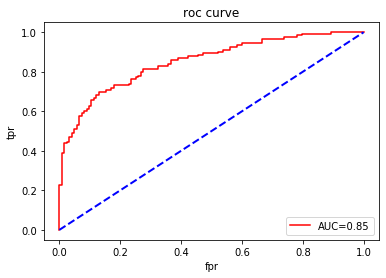

In [244]:
from sklearn.metrics import roc_curve,auc
probs2=RFCbest_classifier.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

In [245]:
importances2 =RFCbest_classifier.feature_importances_
print(importances2)

[0.09986475 0.1526114  0.18080369 0.1143637  0.08994523 0.10803976
 0.06936489 0.0623207  0.10013244 0.02255344]


(0, 1)

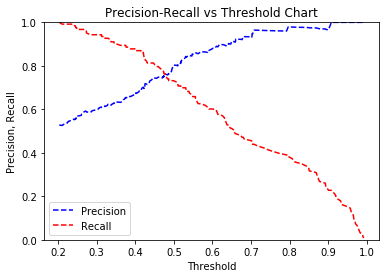

In [246]:
from sklearn.metrics import precision_recall_curve
probs = RFCbest_classifier.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

### Adaboost classification

In [147]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
Adaboostparams = {
            "base_estimator": [DecisionTreeClassifier(class_weight = "balanced"),
                               LogisticRegression(class_weight = 'balanced', penalty = 'l2', solver = 'sag')],
            "n_estimators" : [500, 1000],
            "learning_rate" : [0.01, 0.1, 1.0]
        }
ada_clf = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = Adaboostparams, cv = 3, n_jobs = -1, scoring = "f1")
ada_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight='balanced',
                                                                   criterion='gini',
                                                                   max_depth=None,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_im...
                                                               

In [148]:
ada_clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                 

In [297]:
adaboost_classifier= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=15,
                                                         max_features=4,
                                                         max_leaf_nodes=None,
                                                         min_samples_leaf=4,
                                                         min_samples_split=4,
                                                         random_state=seed,
                                                         splitter='best'),
                   learning_rate=0.001, n_estimators=2500, random_state=seed).fit(X_train,y_train)
ada_pred=adaboost_classifier.predict(X_test)
ada_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [298]:
labels = [1, 0]
ada_con_mat = confusion_matrix(y_test,ada_pred, labels = labels)
print(ada_con_mat)

[[ 97  26]
 [ 16 107]]


In [299]:
adaboost_accuracy = (ada_con_mat[0,0]+ada_con_mat[1,1])/y_test.size
print('adaboost_accuracy : ',adaboost_accuracy)    # Mean Accuracy on testing data
adaboost_Precision = ada_con_mat[0][0]/(ada_con_mat[0][0] + ada_con_mat[1][0])
print('adaboost_Precision : ',adaboost_Precision)
print('adaboost_Training Accuracy: ',adaboost_classifier.score(X_train, y_train)) # training accuracy
print('adaboost_Testing Accuracy : ',adaboost_classifier.score(X_test, y_test)) # testing Accuracy

adaboost_accuracy :  0.8292682926829268
adaboost_Precision :  0.8584070796460177
adaboost_Training Accuracy:  1.0
adaboost_Testing Accuracy :  0.8292682926829268


In [300]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = adaboost_classifier.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       287

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



In [301]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = adaboost_classifier.predict(X_test)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       123
           1       0.86      0.79      0.82       123

    accuracy                           0.83       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.83      0.83      0.83       246



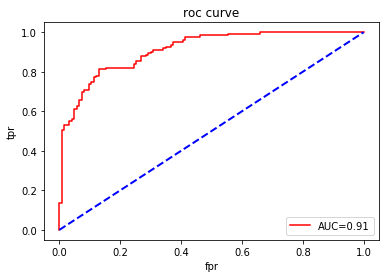

In [302]:
from sklearn.metrics import roc_curve,auc
probs2=adaboost_classifier.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

(0, 1)

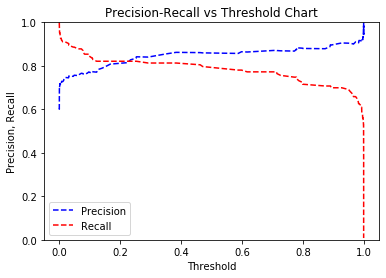

In [303]:
from sklearn.metrics import precision_recall_curve
probs = adaboost_classifier.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

### KNN

In [304]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [305]:
KNN_pred = KNNclassifier1.predict(X_test)
KNN_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [306]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = KNNclassifier1.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       287
           1       0.86      0.67      0.76       287

    accuracy                           0.78       574
   macro avg       0.80      0.78      0.78       574
weighted avg       0.80      0.78      0.78       574



In [307]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = KNNclassifier1.predict(X_test)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       123
           1       0.78      0.56      0.65       123

    accuracy                           0.70       246
   macro avg       0.72      0.70      0.69       246
weighted avg       0.72      0.70      0.69       246



In [308]:
KNNclassifier1.score(X_test,y_test)

0.6991869918699187

In [310]:
KNNparam_grid = {'n_neighbors':[2,6,10,11],# number of neighbors
                'weights':['uniform','distance'],
                 'leaf_size':[20,30,40,50],
                 'n_jobs':[-1]
               }
KNN_clf = GridSearchCV(KNeighborsClassifier(),param_grid=KNNparam_grid,cv=5,n_jobs=-1)
KNN_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [20, 30, 40, 50], 'n_jobs': [-1],
                         'n_neighbors': [2, 6, 10, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [311]:
KNN_clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='distance')

In [341]:
KNNbest_classifier= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='distance').fit(X_train,y_train)
KNN_pred2=KNNbest_classifier.predict(X_test)
KNN_pred2

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [342]:
labels = [1, 0]
KNN_con_mat = confusion_matrix(y_test,KNN_pred2, labels = labels)
print(KNN_con_mat)

[[ 70  53]
 [ 18 105]]


In [343]:
KNN_accuracy = (KNN_con_mat[0,0]+KNN_con_mat[1,1])/y_test.size
print('KNN_Accuracy : ',KNN_accuracy)    # Mean Accuracy on testing data
KNN_precision = KNN_con_mat[0][0]/(KNN_con_mat[0][0] + KNN_con_mat[1][0])
print('rfc_Precision2 : ',KNN_precision)
print('KNN_Training Accuracy: ',KNNbest_classifier.score(X_train, y_train)) # training accuracy
print('KNN_Testing Accuracy : ',KNNbest_classifier.score(X_test, y_test)) # testing Accuracy

KNN_Accuracy :  0.7113821138211383
rfc_Precision2 :  0.7954545454545454
KNN_Training Accuracy:  1.0
KNN_Testing Accuracy :  0.7113821138211383


In [344]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = KNNbest_classifier.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       287

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



In [345]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = KNNbest_classifier.predict(X_test)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.66      0.85      0.75       123
           1       0.80      0.57      0.66       123

    accuracy                           0.71       246
   macro avg       0.73      0.71      0.71       246
weighted avg       0.73      0.71      0.71       246



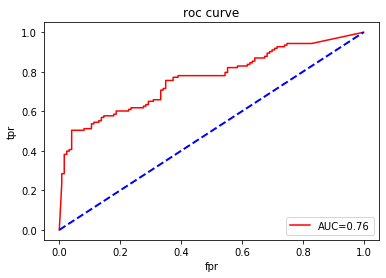

In [346]:
from sklearn.metrics import roc_curve,auc
probs2=KNNbest_classifier.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

(0, 1)

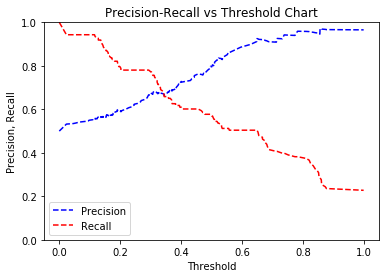

In [347]:
from sklearn.metrics import precision_recall_curve
probs = KNNbest_classifier.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

In [348]:
from sklearn import metrics

k_range = range(1, 15)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.6829268292682927, 0.6788617886178862, 0.6707317073170732, 0.6951219512195121, 0.6991869918699187, 0.7154471544715447, 0.6910569105691057, 0.6991869918699187, 0.6991869918699187, 0.7113821138211383, 0.7154471544715447, 0.7073170731707317, 0.6869918699186992, 0.7032520325203252]


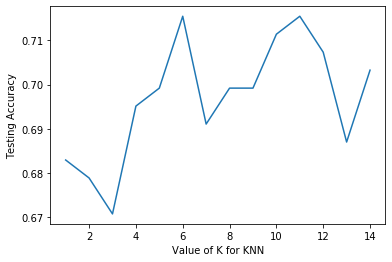

In [349]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()